# Walmart Sales Forecasting

## Table of Contents

1. [Import Packages](#Import_Packages)<br>
2. [Data Wrangling](#Data_Wrangling)<br>
3. [Exploratory Data Analysis](#Exploratory_Data_Analysis)<br>
    3.1 [Data Cleaning and Initial Analysis](#Data_Cleaning_and_Initial_Analysis)<br>
    3.2 [Data Merging](#Data_Merging)<br>
    3.3 [Data Visualization](#Data_Visualization)<br>

<a id='Import_Packages'></a>
## Import Packages

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import math

<a id='Data_Wrangling'></a>
## Data Wrangling

### Importing Files

In [2]:
# Import the file: walmart_features
features_file_path = r'C:\Users\Noah\Desktop\GitHub\Springboard\Capstone Projects\Capstone_2_WalmartSalesForecasting\walmart_data\walmart_features.csv'
features_df = pd.read_csv(features_file_path, parse_dates=['Date'])

In [3]:
# Import the file: walmart_stores
stores_file_path = r'C:\Users\Noah\Desktop\GitHub\Springboard\Capstone Projects\Capstone_2_WalmartSalesForecasting\walmart_data\walmart_stores.csv'
stores_df = pd.read_csv(stores_file_path)

In [4]:
# Import the file: walmart_data
data_file_path = r'C:\Users\Noah\Desktop\GitHub\Springboard\Capstone Projects\Capstone_2_WalmartSalesForecasting\walmart_data\walmart_train.csv'
data_df = file = pd.read_csv(data_file_path, parse_dates=['Date'])

### Create a holidays dataframe for later use (maybe)

In [5]:
holidays_dict = {
    'Super Bowl':['12-Feb-10','11-Feb-11','10-Feb-12','8-Feb-13'],
    'Labor Day':['10-Sep-10','9-Sep-11','7-Sep-12','6-Sep-13'],
    'Thanksgiving':['26-Nov-10','25-Nov-11','23-Nov-12','29-Nov-13'],
    'Christmas':['31-Dec-10','30-Dec-11','28-Dec-12','27-Dec-13']
    }

holidays_df = pd.DataFrame(holidays_dict, dtype='datetime64[ns]')
holidays_df

,Super Bowl,Labor Day,Thanksgiving,Christmas
0,2010-02-12,2010-09-10,2010-11-26,2010-12-31
1,2011-02-11,2011-09-09,2011-11-25,2011-12-30
2,2012-02-10,2012-09-07,2012-11-23,2012-12-28
3,2013-02-08,2013-09-06,2013-11-29,2013-12-27


<a id='Exploratory_Data_Analysis'></a>
## Exploratory Data Analysis

<a id='Data_Cleaning_and_Initial_Analysis'></a>
### Data Cleaning and Initial Analysis

#### "Data" Dataset

In [6]:
data_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [8]:
# What years are present in 'data'?
data_df.Date.dt.year.unique()

array([2010, 2011, 2012], dtype=int64)

In [9]:
# What unique combinations of 'Store' and 'Dept' are there?
unique_storeAndDept = data_df[['Store','Dept']].drop_duplicates()
unique_storeAndDept.set_index(['Store','Dept'])

Empty DataFrame
Columns: []
Index: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 40), (1, 41), (1, 42), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 51), (1, 52), (1, 54), (1, 55), (1, 56), (1, 58), (1, 59), (1, 60), (1, 67), (1, 71), (1, 72), (1, 74), (1, 77), (1, 78), (1, 79), (1, 80), (1, 81), (1, 82), (1, 83), (1, 85), (1, 87), (1, 90), (1, 91), (1, 92), (1, 93), (1, 94), (1, 95), (1, 96), (1, 97), (1, 98), (1, 99), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), ...]

[3331 rows x 0 columns]

In [10]:
# So it seems there are up to 99 departments per store, let's check out each observation with a department 99
data_df[data_df['Dept'] == 99]

,Store,Dept,Date,Weekly_Sales,IsHoliday
10207,1,99,2010-07-02,0.01,False
10208,1,99,2011-03-04,380.00,False
10209,1,99,2011-03-11,50.00,False
10210,1,99,2011-05-13,230.00,False
10211,1,99,2011-06-17,50.00,False
...,...,...,...,...,...
404761,43,99,2011-11-18,50.00,False
404762,43,99,2012-01-06,25.00,False
404763,43,99,2012-06-15,5.00,False
411931,44,99,2010-03-05,0.01,False


#### "Stores" Dataset

In [11]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [12]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [13]:
# Change "Type" column to dtype "category"
stores_df.Type = stores_df.Type.astype('category')

In [14]:
# What store types are there?
stores_df.Type.unique()

['A', 'B', 'C']
Categories (3, object): ['A', 'B', 'C']

In [15]:
# What are the simple statistics of these stores' sizes, grouped by type?
stores_df.groupby('Type')['Size'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.727273,49392.621098,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.705882,32371.137916,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.666667,1304.145033,39690.0,39745.00,39910.0,40774.0,42988.0


#### "Features" Dataset

In [16]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [17]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [18]:
# What years are covered by the "features" file?
features_df.Date.dt.year.unique()

array([2010, 2011, 2012, 2013], dtype=int64)

In [19]:
# So, many of the markdown columns are null, this is likely because there are simply not markdowns applied to these dates.
# Let's see the observations of MarkDown1 which aren't null.
features_df[features_df.MarkDown1.notnull()]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,2011-11-18,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,2011-11-25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,2011-12-02,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,2011-12-09,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [20]:
# Let's look at the null CPI observations.
features_df[features_df['CPI'].isnull()]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
169,1,2013-05-03,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,NaN,False
170,1,2013-05-10,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,NaN,False
171,1,2013-05-17,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,NaN,False
172,1,2013-05-24,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,NaN,False
173,1,2013-05-31,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


There are many null values, however, they all occur within "Markdown" columns. It seems I should leave these alone as only rows with markdown events occurring within them have their respective markdowns.

<a id='Data_Merging'></a>
### Data Merging

Now all of the datasets have been cleaned and an initial analysis has been made.

It seems potentially useful features for predicting store-department-date sales (that's the grouping for the desired predicition; it's odd to read, I agree) are separated between these dataframes.

Let's merge them together.

In [21]:
print(data_df.columns)
print(stores_df.columns)
print(features_df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Index(['Store', 'Type', 'Size'], dtype='object')
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [22]:
# Check the shapes of the datasets before merging, to make sure that data isn't lost
print(data_df.shape)
print(stores_df.shape)
print(features_df.shape)

(421570, 5)
(45, 3)
(8190, 12)


In [23]:
# Let's start by inner joining the stores dataset onto data dataset
merged_data = data_df.merge(stores_df)
print(merged_data.shape)
merged_data.head()

(421570, 7)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [24]:
# Looks like nothing was lost, the same amount of observations remain and the features increased by the correct amount
merged_data = merged_data.merge(features_df)
print(merged_data.shape)
merged_data.head()

(421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


Again, nothing was lost and the new features were added. Great!

In [25]:
merged_data.sort_values(['Store','Dept','Date','Weekly_Sales'])

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
73,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
145,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
218,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
290,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421302,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421370,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421436,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421502,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


<a id='Data_Visualization'></a>
### Data Visualization

Let's visualize the correlation between features via a heatmap to begin

In [26]:
# Define a function to generate a features correlations heatmap
def half_masked_corr_heatmap(dataframe, annot=False, title=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)
    
    mask= np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style('white'):
        sns.heatmap(dataframe.corr(), mask=mask, center=0, annot=annot, cmap='coolwarm')
        
    if title: plt.title(f'\n{title}\n', fontsize=18)
    
    plt.show()
    
    return

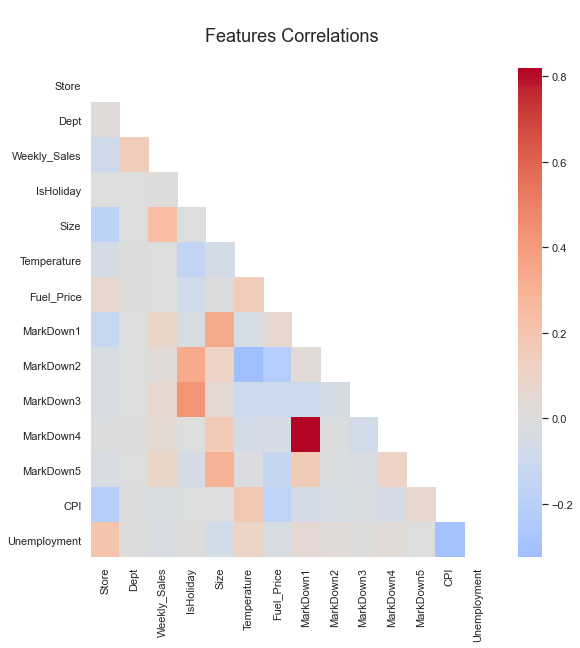

In [27]:
half_masked_corr_heatmap(merged_data, title='Features Correlations')

Overall there aren't very high correlations, but notable correlations are:

- MarkDown1 with MarkDown4, though that's (probably) not useful
- IsHoliday with MarkDown3

Let's focus on the target feature: Weekly_Sales

In [28]:
# Define a function to generate a correlation heatmap between the target feature and other features
def corr_to_target(dataframe, target, annot=False, title=None):
    plt.figure(figsize=(4,6))
    sns.set(font_scale=1)
    
    sns.heatmap(dataframe.corr()[[target]].sort_values(target, ascending=False)[1:], center=0, annot=annot, cmap='coolwarm')
    
    if title: plt.title(f'\n{title}\n', fontsize=18)
    
    plt.show()
    
    return

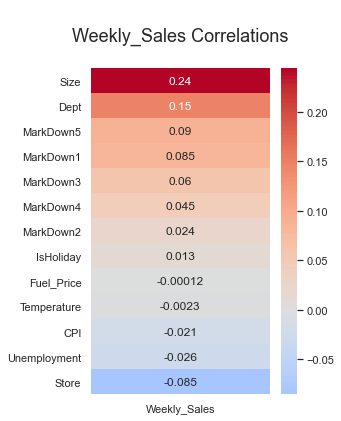

In [29]:
corr_to_target(dataframe=merged_data, target='Weekly_Sales', annot=True, title='Weekly_Sales Correlations')

Here we can focus in on the important correlations, but none are very high correlations. This may be pointing to multivariate regression for best prediction of sales.

We haven't yet visualized the correlation of Weekly_Sales and Date yet, let's see that.

In [30]:
# Define a function to generate subplot scatterplots, each plotting passed features vs. passed target-feature
def gen_scatterplots(dataframe, target_column, list_of_columns, cols=1, alpha=0.1):
    rows = math.ceil(len(list_of_columns) / cols)
    figwidth = 5 * cols
    figheight = 4 * rows
    
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(figwidth, figheight))
    
    colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:pink','tab:olive','tab:cyan','coral','mediumseagreen']
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns):
        ax[i].scatter(dataframe[column], dataframe[target_column], c=colors[i % len(colors)], alpha=alpha)  
        ax[i].set_xlabel(f'{target_column}', fontsize=14)
        ax[i].set_ylabel(f'{column}', fontsize=14)
        
    fig.suptitle(f'\nFeatures vs. {target_column}', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    
    plt.show()
    
    return

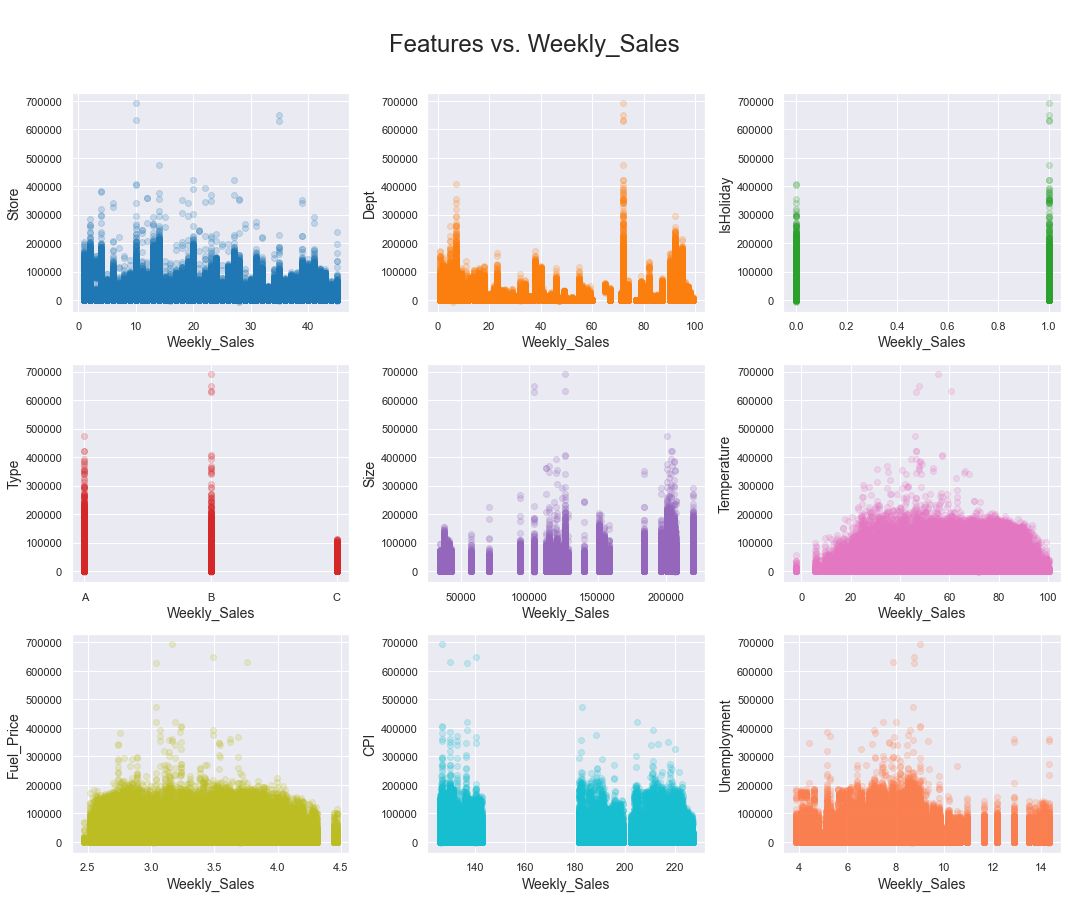

In [31]:
gen_scatterplots(merged_data, 'Weekly_Sales', ['Store', 'Dept', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], cols=3, alpha=0.2)

In [46]:
# Define a function to generate subplot histograms, each plotting one of the passed DataFrame's features
def gen_histograms(dataframe, df_name, cols=1, alpha=1):
    rows = math.ceil(len(dataframe.columns)/cols)
    figwidth = 5 * cols
    figheight = 4 * rows
    
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(figwidth, figheight))
    
    colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:pink','tab:olive','tab:cyan','orangered','mediumseagreen']
    
    ax = ax.ravel()
    
    for i, column in enumerate(dataframe.columns):
        ax[i].hist(dataframe[column], color=colors[i % len(colors)], alpha=alpha)
        ax[i].set_title(f'{dataframe[column].name}', fontsize=18)
        ax[i].set_xlabel('', fontsize=14)
        ax[i].set_ylabel('Observations', fontsize=14)
        
    fig.suptitle(f'\nHistograms for Features in {df_name}', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    
    plt.show()
    
    return

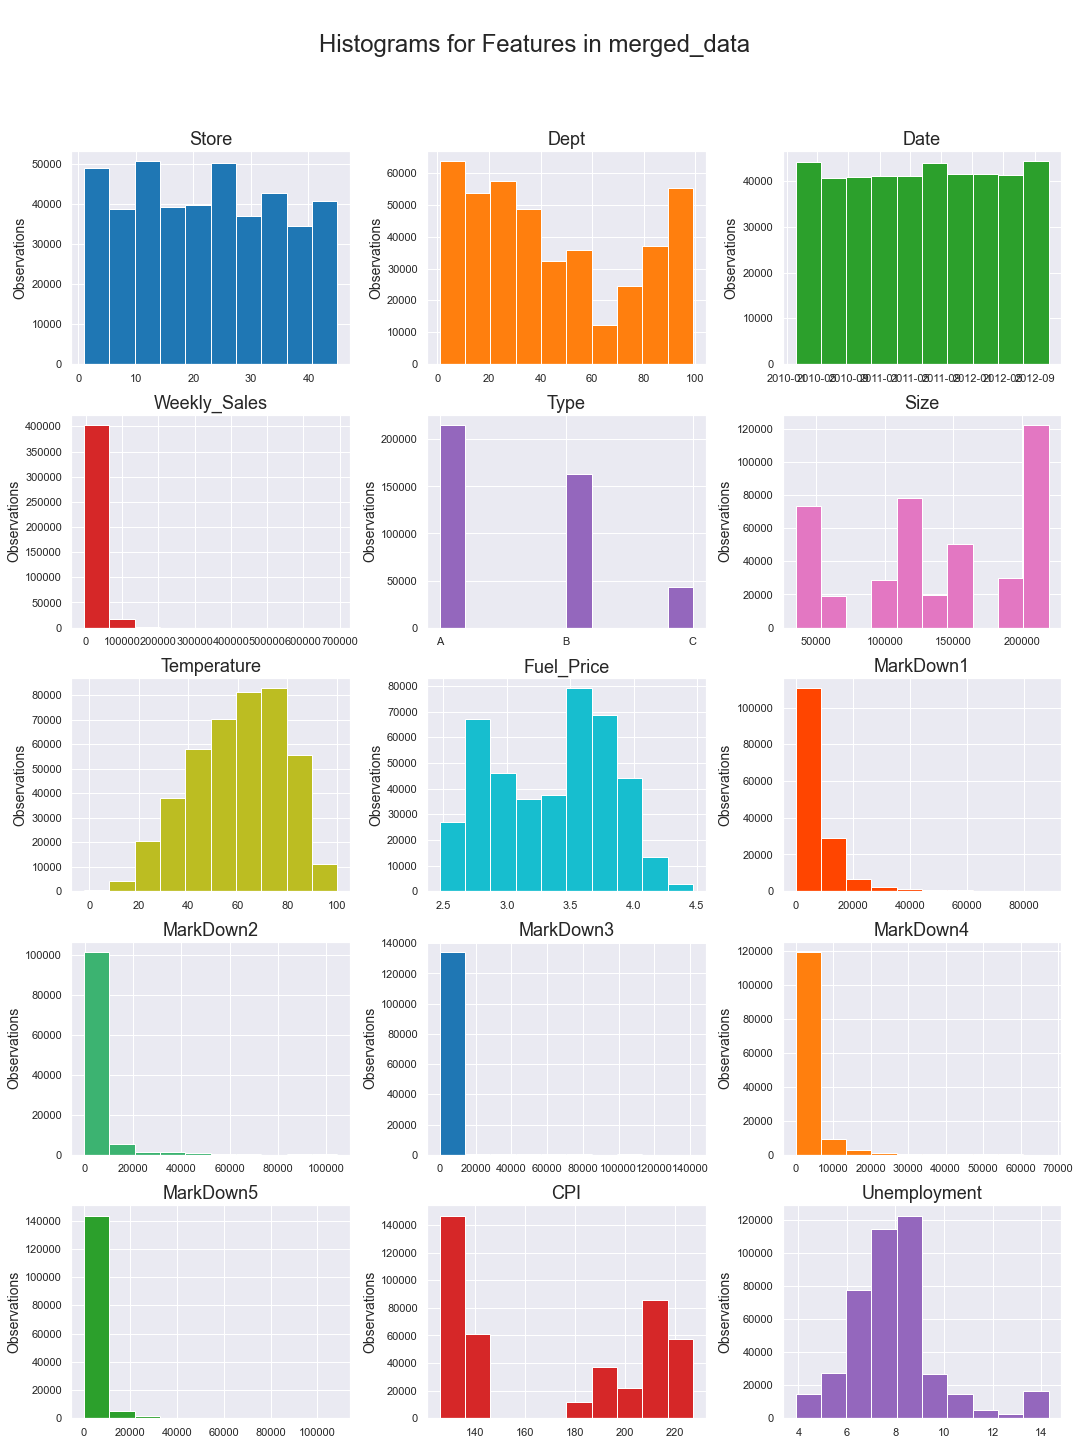

In [47]:
gen_histograms(merged_data.loc[:, merged_data.columns != 'IsHoliday'], 'merged_data', cols=3)

In [35]:
# Create a DataFrame to visualize the year vs. Weekly_Sales vs. [time-period].
date_vs_weeklySales = pd.DataFrame()
date_vs_weeklySales['Week'] = merged_data.Date.dt.isocalendar().week
date_vs_weeklySales['Month'] = merged_data.Date.dt.month
date_vs_weeklySales['Year'] = merged_data.Date.dt.isocalendar().year
date_vs_weeklySales['Weekly_Sales'] = merged_data.Weekly_Sales
date_vs_weeklySales['Size'] = merged_data.Size

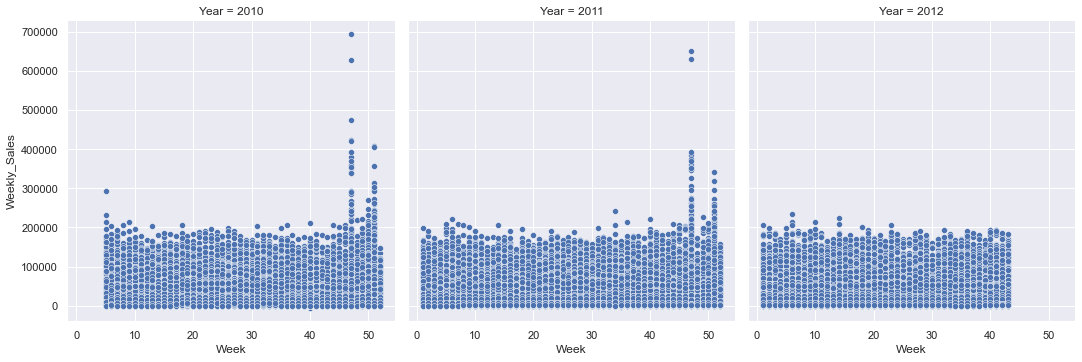

In [36]:
# Let's see the years' weeks' weekly sales:
_ = sns.relplot(data=date_vs_weeklySales, x='Week', y='Weekly_Sales', col='Year', kind='scatter')

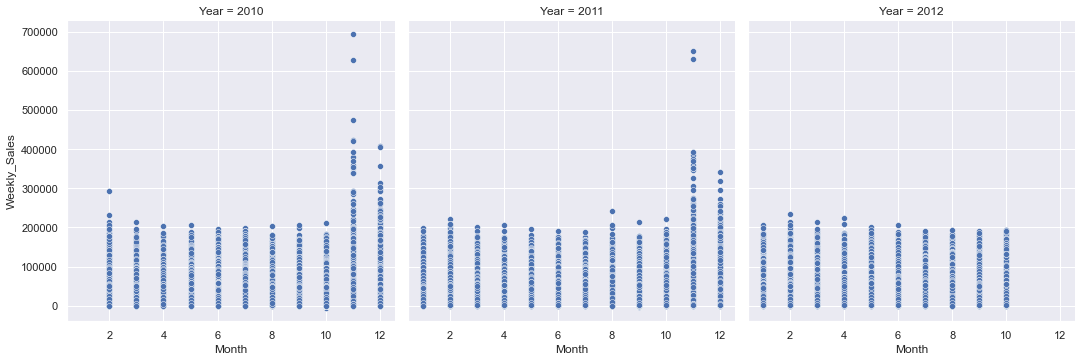

In [37]:
# Let's see the years' months' weekly sales:
_ = sns.relplot(data=date_vs_weeklySales, x='Month', y='Weekly_Sales', col='Year', kind='scatter')